In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.simplefilter("ignore")

In [68]:
data = pd.read_csv(r'C:\Users\Praveen\Desktop\ML\Data\titanic-train.csv.txt',index_col=0)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [70]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [72]:
age_missing_percentage=(data['Age'].isnull().sum()/len(data))*100
age_missing_percentage

19.865319865319865

In [73]:
cabin_missing_percentage=(data['Cabin'].isnull().sum()/len(data))*100
cabin_missing_percentage

77.10437710437711

In [74]:
cabin_missing_percentage=(data['Embarked'].isnull().sum()/len(data))*100
cabin_missing_percentage

0.22446689113355783

As cabin missing percentage is more than 70% so,its better to drop it.

In [75]:
data.drop(['Cabin'],axis=1,inplace=True)

In [76]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [77]:
age_mean=data.Age.mean()
age_median=data.Age.median()
print("mean:",age_mean,"median:",age_median)

mean: 29.69911764705882 median: 28.0


In [78]:
data['Age']=data.Age.fillna(age_median)

In [79]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

As this attribute is categorical, I will fill the missing values with "S".

In [80]:
data['Embarked']=data.Embarked.fillna('S')

In [81]:
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

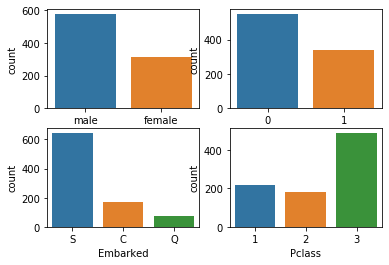

In [82]:
cat_col=['Sex','Survived','Embarked','Pclass']
i=0
for name in cat_col:
    i=i+1
    plt.subplot(2,2,i)
    sns.countplot(name,data=data)
plt.show()

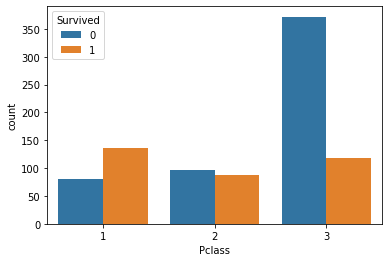

In [83]:
sns.countplot(x='Pclass',hue='Survived',data=data)

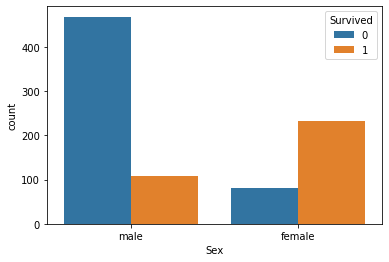

In [84]:
sns.countplot(x='Sex',hue='Survived',data=data)

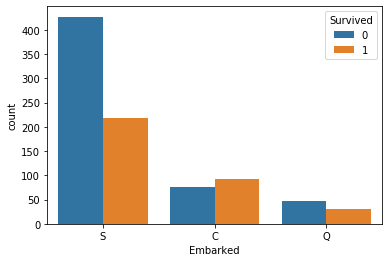

In [85]:
sns.countplot(x='Embarked',hue='Survived',data=data)

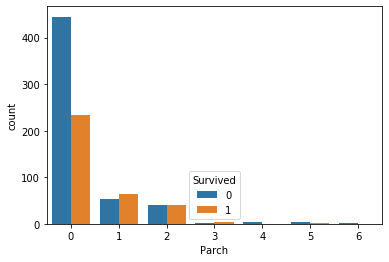

In [86]:
sns.countplot(x='Parch',hue='Survived',data=data)

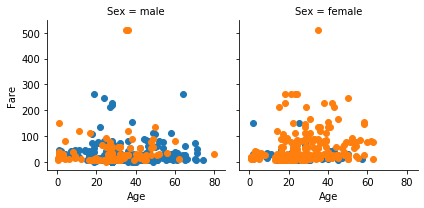

In [87]:
f=sns.FacetGrid(data,col='Sex',hue='Survived')
f.map(plt.scatter,"Age","Fare")

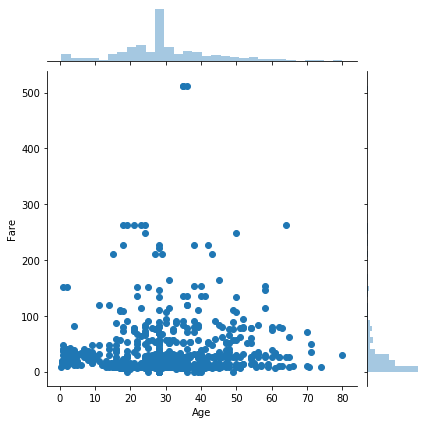

In [88]:
sns.jointplot(data['Age'],data['Fare'])

There are few outliers in fare and the data is left skewed while age looks like normally distributed.

In [89]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [90]:
dummies=pd.get_dummies(data,columns=['Pclass','Parch','Embarked','Sex'],drop_first=True)

In [91]:
new_df=pd.concat([dummies,data],axis=1)
new_df.columns

Index(['Survived', 'Name', 'Age', 'SibSp', 'Ticket', 'Fare', 'Pclass_2',
       'Pclass_3', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_Q', 'Embarked_S', 'Sex_male', 'Survived', 'Pclass',
       'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [92]:
df=new_df.drop(['Pclass','Parch','Embarked','Ticket','Name','Sex'],axis=1)

In [93]:
df.columns

Index(['Survived', 'Age', 'SibSp', 'Fare', 'Pclass_2', 'Pclass_3', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_Q',
       'Embarked_S', 'Sex_male', 'Survived', 'Age', 'SibSp', 'Fare'],
      dtype='object')

In [94]:
X=df.drop(['Survived'],axis=1)
y=df.iloc[:,0]

In [95]:
X

,Age,SibSp,Fare,Pclass_2,Pclass_3,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S,Sex_male,Age,SibSp,Fare
PassengerId,,,,,,,,,,,,,,,,,
1,22.0,1,7.2500,0,1,0,0,0,0,0,0,0,1,1,22.0,1,7.2500
2,38.0,1,71.2833,0,0,0,0,0,0,0,0,0,0,0,38.0,1,71.2833
3,26.0,0,7.9250,0,1,0,0,0,0,0,0,0,1,0,26.0,0,7.9250
4,35.0,1,53.1000,0,0,0,0,0,0,0,0,0,1,0,35.0,1,53.1000
5,35.0,0,8.0500,0,1,0,0,0,0,0,0,0,1,1,35.0,0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.0,0,13.0000,1,0,0,0,0,0,0,0,0,1,1,27.0,0,13.0000
888,19.0,0,30.0000,0,0,0,0,0,0,0,0,0,1,0,19.0,0,30.0000
889,28.0,1,23.4500,0,1,0,1,0,0,0,0,0,1,0,28.0,1,23.4500


In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [97]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
lr.score(X_test,y_test)

C:\Users\Praveen\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8033898305084746

In [98]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.82      0.87      0.85       184\n           1       0.76      0.69      0.73       111\n\n    accuracy                           0.80       295\n   macro avg       0.79      0.78      0.79       295\nweighted avg       0.80      0.80      0.80       295\n'

In [99]:
confusion_matrix(y_test,pred)

array([[160,  24],
       [ 34,  77]], dtype=int64)

In [100]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
pred1=knn.predict(X_test)
knn.score(X_test,y_test)

0.7186440677966102

In [101]:
classification_report(y_test,pred1)

'              precision    recall  f1-score   support\n\n           0       0.75      0.83      0.79       184\n           1       0.65      0.54      0.59       111\n\n    accuracy                           0.72       295\n   macro avg       0.70      0.68      0.69       295\nweighted avg       0.71      0.72      0.71       295\n'

In [102]:
confusion_matrix(y_test,pred1)

array([[152,  32],
       [ 51,  60]], dtype=int64)